In [25]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter

Data Collection:

In [26]:
# Read the CSV file
train_data = pd.read_csv('train_data.csv', sep= ':::', encoding= 'latin-1',engine = "python", names=['Title', 'Genre', 'Description'])

Data Info

In [27]:
test_data=pd.read_csv( 'test_data.csv' , sep=':::', encoding = 'latin-1',engine='python',names=['ID', 'Title','Description'])
test_data.head()

,ID,Title,Description
0,"ï»¿""1",Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,"""2",La guerra de papÃÂ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,"""3",Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,"""4",Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,"""5",Er nu zhai (1955),Before he was known internationally as a mart...


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 131 (\x83) missing from current font.

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['Description'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_5, *['ID', 'Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *['Title', 'Description'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['index', 'ID'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_8, *['index', 'Title'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['index', 'Description'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['index', 'count()', 'ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['index', 'count()', 'Title'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['index', 'count()', 'Description'], **{})
chart

In [28]:
train_data

,Title,Genre,Description
"ï»¿""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
"""54210","""""Bonino"""" (1953)",comedy,This short-lived NBC live sitcom centered on ...
"""54211",Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
"""54212",Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
"""54213",Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [29]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54108
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, ï»¿"1  to "54214 
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [31]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

**Data Visualization**

Text(0.5, 1.0, 'Distribution of Genres')

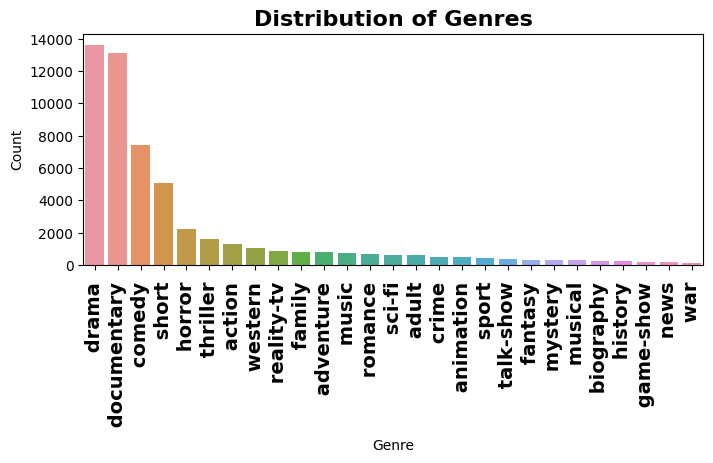

In [32]:
plt.figure(figsize=(8,3))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts, orient='v')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')

In [33]:
train_data['length']=train_data['Description'].apply(len)
train_data.head()

,Title,Genre,Description,length
"ï»¿""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,617
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,254
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,722
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1124
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...,695


Data Preprocessing

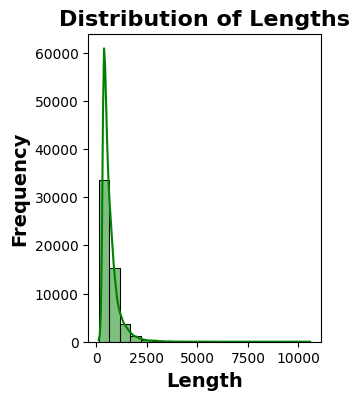

In [34]:
#plot data
plt.figure(figsize=(3, 4))
sns.histplot(data=train_data, x='length', bins=20, kde=True, color='green')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [60]:
#stemming algorithm from the NLTK (Natural Language Toolkit) library in Python
#nltk stopwords
##Improving Model Performance: nltk.corpus.stopwords.words
def clean_text(text):
    text = text.lower()
    text = re.sub('-',' ',text.lower())
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    text =  re.sub(r'@\S+', '',text)
    text =  re.sub(r'http\S+', '',text)
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text = re.sub("\s[\s]+", " ",text).strip()
    return re.sub(f'[{re.escape(string.punctuation)}]','',text)
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem yee


In [37]:
# text cleaning function
#applying functions
'''Lowercasing all text to ensure consistency.
Removing special characters, digits, and punctuation.
Removing stopwords (commonly used words that don't carry much meaning, like "the" or "and").
Stemming or lemmatizing words to reduce them to their root form.
Removing URLs or other specific patterns that might not be relevant.
'''
train_data['Text_cleaning'] = train_data.Description.apply(clean_text)
test_data['Text_cleaning'] = test_data.Description.apply(clean_text)
#train_data info

,Title,Genre,Description,length,Text_cleaning
"ï»¿""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,617,list convers doct parents year old osc learn n...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,254,broth sist past incestu rel cur murd relations...
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,722,bus empty stud field trip muse nat history lit...
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1124,help unemploy fath mak end meet edi twin sist ...
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...,695,films titl ref recov body ground zero also sta...


In [38]:
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len)
train_data.head()

,Title,Genre,Description,length,Text_cleaning,length_Text_cleaning
"ï»¿""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,617,list convers doct parents year old osc learn n...,324
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,254,broth sist past incestu rel cur murd relations...,83
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,722,bus empty stud field trip muse nat history lit...,324
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1124,help unemploy fath mak end meet edi twin sist ...,600
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...,695,films titl ref recov body ground zero also sta...,284


Feature Extraction

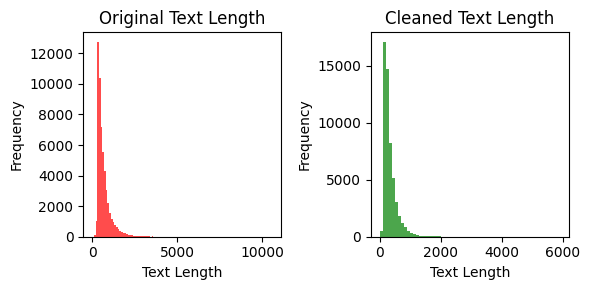

In [39]:
#Feature Extraction: data preparation###machine learning model
plt.figure(figsize=(6, 3))


plt.subplot(1, 2, 1)
original_lengths = train_data['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='red', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
(train_data['length_Text_cleaning']>2000).value_counts()

False    54133
True        81
Name: length_Text_cleaning, dtype: int64

In [41]:
print('Dataframe size (before removal): ',len(train_data))
filt=train_data['length_Text_cleaning']>2000
train_data.drop(train_data[filt].index,axis=0,inplace=True)
print('Dataframe size (after removal): ',len(train_data))
print(f'Removed rows: {filt.sum()}')

Dataframe size (before removal):  54214
Dataframe size (after removal):  54133
Removed rows: 81


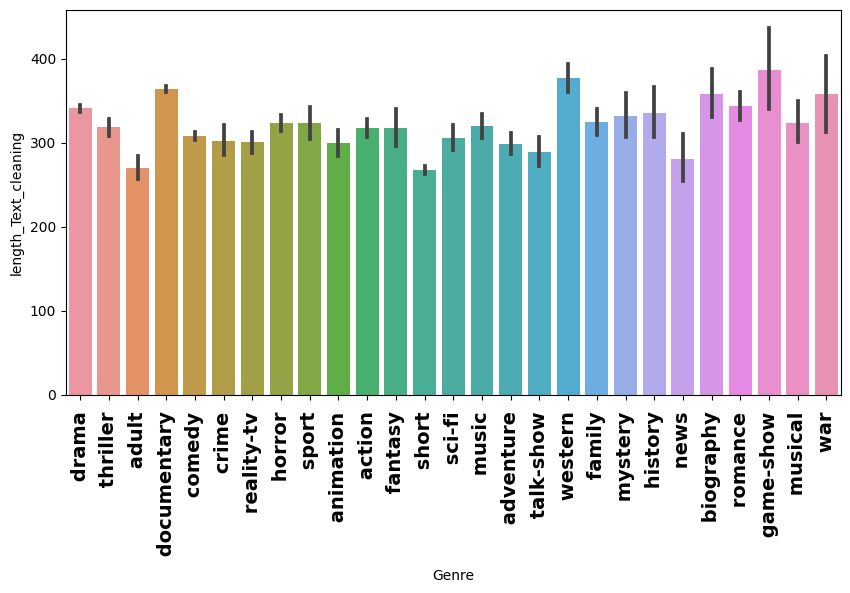

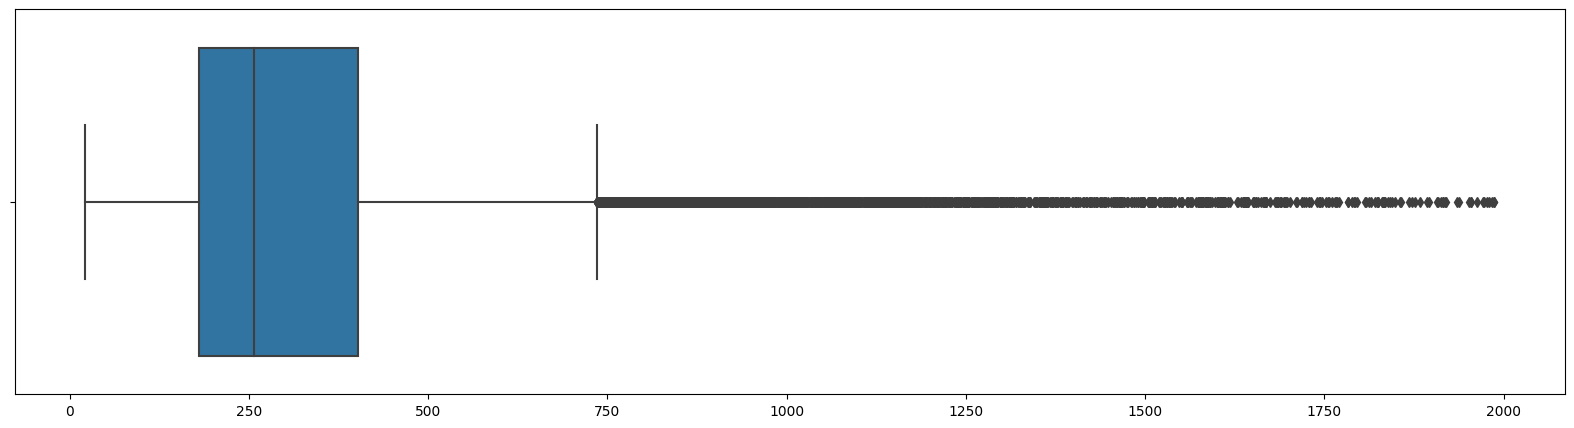

In [61]:
#data visualization ##genre##
plt.figure(figsize=(10,5))
sns.barplot(x='Genre',y='length_Text_cleaning',data=train_data)
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=train_data['length_Text_cleaning'].values,hue='Genre',data=train_data)
plt.show()

In [43]:
#a bit of data preprocessing parts
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['Text_cleaning'].values)

test_path='test_data_solution.csv'
test_data_solution=pd.read_csv( test_path , sep=':::',encoding = 'latin-1',engine='python',names=['ID','Title','Genre','Description'])
test_data_solution #test_data_solution.csv file

,ID,Title,Genre,Description
0,"ï»¿""1",Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,"""2",La guerra de papÃÂ¡ (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,"""3",Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,"""4",Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,"""5",Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,"""54196","""""Tales of Light & Dark"""" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,"""54197",Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,"""54198",Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,"""54199",Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


Model Training


In [44]:

X = tokenizer.texts_to_sequences(train_data['Text_cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_data['Genre']).values

X_test = tokenizer.texts_to_sequences(test_data['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(test_data_solution['Genre']).values

In [45]:
for x in test_data_solution['Genre'].values:
    if(x==8):
        print(x)

In [46]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
#data shape view
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X shape: (54133, 250)
y shape: (54133, 27)
X_test shape: (54200, 250)
y_test shape: (54200, 27)


In [50]:
#main
#model evaluation
###Monitoring and Maintenance:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=2,
                               mode='auto')]
history = model.fit(X, y, epochs=6, batch_size=32,validation_data=(X_test,y_test), callbacks=my_callbacks)

Epoch 1/6
1692/1692 [==============================] - 1594s 941ms/step - loss: 1.7518 - accuracy: 0.4933 - val_loss: 1.6255 - val_accuracy: 0.5291
Epoch 2/6
1692/1692 [==============================] - 1551s 916ms/step - loss: 1.3246 - accuracy: 0.6171 - val_loss: 1.5884 - val_accuracy: 0.5465
Epoch 3/6
1692/1692 [==============================] - 1547s 914ms/step - loss: 1.0028 - accuracy: 0.7093 - val_loss: 1.6481 - val_accuracy: 0.5427
Epoch 4/6
1692/1692 [==============================] - 1545s 913ms/step - loss: 0.7395 - accuracy: 0.7833 - val_loss: 1.8115 - val_accuracy: 0.5300


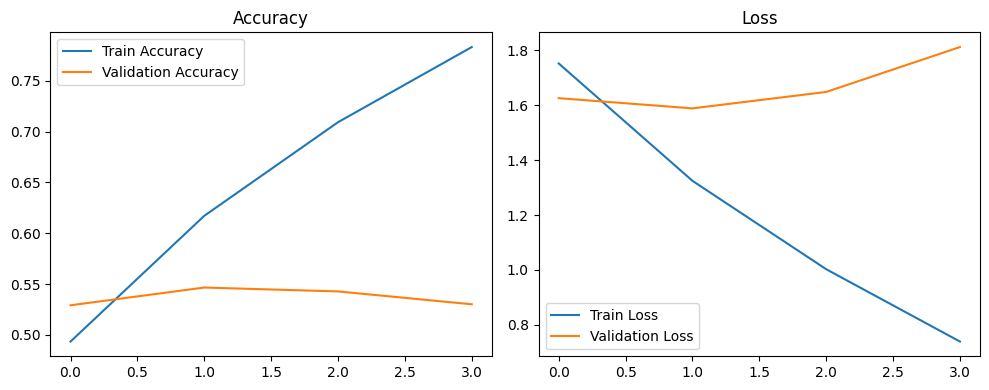

In [52]:
###Visualization
##Data Analysis data exploration
'''Visualize the model's predictions and performance using charts, graphs, or dashboards'''
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [54]:
#model train
joblib.dump(model,'GenreClass.pkl')
nwmod = joblib.load('GenreClass.pkl')
####model predictions
agg = nwmod.predict(X_test)

1694/1694 [==============================] - 201s 118ms/step


## **Model Trained**

In [59]:
print(np.argmax(agg[16]))
print(np.argmax(agg[561]))

5
5


In [ ]:
created by samudranil dutta ..!!